In [1]:
# install dependencies
%pip install -q \
  matplotlib \
  pandas \
  pycaret \
  "pycaret[analysis]" \
  seaborn

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [2]:
# set up the environment for the notebook
import os
os.environ['PYCARET_CUSTOM_LOGGING_LEVEL'] = 'CRITICAL'

import pandas
pandas.set_option('display.max_columns', 128)

In [3]:
# prepare the data
from pathlib import Path
from pycaret.datasets import get_data
from zipfile import ZipFile

data_name = 'heart_2022_no_nans'

# extract the compressed data file
if Path(f'../data/{data_name}.csv').exists():
  print(f'Data file "{data_name}" was already extracted')
else:
  ZipFile(f'../data/{data_name}.zip', 'r').extract(
    f'data/{data_name}.csv', '..'
  )
  print(f'Data file "{data_name}" has been extracted successfully')

# load the data
print(f'Loading data file "{data_name}"')
DATA = get_data(dataset=f'../data/{data_name}')

Data file "heart_2022_no_nans" was already extracted
Loading data file "heart_2022_no_nans"


State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack HadAngina HadStroke  \
0         9.0            None of them             No        No        No   
1         6.0            None of them             No        No        No   
2         8.0  6 or more, but not all             No        No        No   
3         9.0            None of them             No        No        No   
4         5.0                  1 to 5             No        No        No   

  HadAsthma HadSkinCancer HadCOPD HadDepressiveDisorder HadKidneyDisease  \
0        No            No      No                    No               No   
1        No            No      No                    No               No   
2        No            No      No                    No               No   
3        No           Yes      No                   Yes               No   
4        No            No      No                    No               No   

  HadArthritis HadDiabetes DeafOrHardOfHearing BlindOrVisionDifficulty  \
0          Yes          No                  No                      No   
1          Yes         Yes                  No                      No   
2          Yes          No                  No                     Yes   
3          Yes          No                  No                      No   
4          Yes          No                  No                      No   

  DifficultyConcentrating DifficultyWalking DifficultyDressingBathing  \
0                      No                No                        No   
1                      No                No                        No   
2                      No               Yes                        No   
3                      No               Yes                        No   
4                      No                No                        No   

  DifficultyErrands   SmokerStatus                            ECigaretteUsage  \
0                No  Former smoker  Never used e-cigarettes in my entire life   
1                No  Former smoker  Never used e-cigarettes in my entire life   
2                No  Former smoker  Never used e-cigarettes in my entire life   
3                No   Never smoked  Never used e-cigarettes in my entire life   
4                No   Never smoked  Never used e-cigarettes in my entire life   

  ChestScan     RaceEthnicityCategory      AgeCategory  HeightInMeters  \
0        No  White only, Non-Hispanic     Age 65 to 69            1.60   
1        No  White only, Non-Hispanic     Age 70 to 74            1.78   
2       Yes  White only, Non-Hispanic     Age 75 to 79            1.85   
3        No  White only, Non-Hispanic  Age 80 or older            1.70   
4        No  White only, Non-Hispanic  Age 80 or older            1.55   

   WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0              71.67  27.99              No         No          Yes   
1              95.25  30.13              No         No          Yes   
2             108.86  31.66             Yes         No           No   
3              90.72  31.32              No         No          Yes   
4              79.38  33

In [4]:
# setting column specifications
TARGET_NAME = 'HadHeartAttack'
IDENTIFIERS = ['State']

In [25]:
# establish an experiment
from pycaret.classification import ClassificationExperiment

exp = ClassificationExperiment()
exp.setup(
  data=DATA,
  train_size=0.05,
  target=TARGET_NAME,
  ignore_features=IDENTIFIERS,
  index=True,
  session_id=123,
  remove_multicollinearity=True,
  multicollinearity_threshold=0.75,
  imputation_type=None,
  fold_shuffle=True,
  max_encoding_ohe=50,
  remove_outliers=True,
  outliers_threshold=0.05,
  # fix_imbalance=True,
  # fix_imbalance_method='ADASYN',
  # group_features={
  #   'Group_Sickness': [
  #     'HadHeartAttack',
  #     'HadAngina',
  #     'HadStroke',    
  #     'HadAsthma',
  #     'HadSkinCancer',
  #     'HadCOPD',
  #     'HadDepressiveDisorder',
  #     'HadKidneyDisease',
  #     'HadArthritis',  
  #     'HadDiabetes',
  #     'RemovedTeeth',
  #   ],
  #   'Group_Difficulty': [
  #     'DeafOrHardOfHearing',
  #     'BlindOrVisionDifficulty',   
  #     'DifficultyConcentrating',
  #     'DifficultyWalking',
  #     'DifficultyDressingBathing',
  #     'DifficultyErrands',
  #   ],
  #   'Group_Behavior': [
  #     'SmokerStatus',
  #     'ECigaretteUsage',
  #     'AlcoholDrinkers',
  #   ],
  #   'Group_Vax': [
  #     'FluVaxLast12',
  #     'PneumoVaxEver',
  #     'TetanusLast10Tdap',
  #     'CovidPos',
  #   ],
  #   'Group_Health': [
  #     'GeneralHealth',
  #     'PhysicalHealthDays',
  #     'MentalHealthDays',
  #     'LastCheckupTime',
  #     'PhysicalActivities',
  #   ],
  # },
)
exp.dataset_transformed

Sex  GeneralHealth_Very good  GeneralHealth_Good  GeneralHealth_Fair  \
151122  1.0                      1.0                 0.0                 0.0   
81966   0.0                      0.0                 1.0                 0.0   
245676  0.0                      0.0                 0.0                 1.0   
2611    1.0                      0.0                 0.0                 0.0   
180061  1.0                      0.0                 1.0                 0.0   
...     ...                      ...                 ...                 ...   
9202    0.0                      0.0                 1.0                 0.0   
229824  1.0                      0.0                 0.0                 0.0   
32801   0.0                      1.0                 0.0                 0.0   
102154  0.0                      0.0                 0.0                 0.0   
3610    0.0                      0.0                 0.0                 0.0   

        GeneralHealth_Excellent  GeneralHealth_Poor  PhysicalHealthDays  \
151122                      0.0                 0.0                 0.0   
81966                       0.0                 0.0                15.0   
245676                      0.0                 0.0                 0.0   
2611                        1.0                 0.0                 0.0   
180061                      0.0                 0.0                 2.0   
...                         ...                 ...                 ...   
9202                        0.0                 0.0                 0.0   
229824                      1.0                 0.0                 7.0   
32801                       0.0                 0.0                 0.0   
102154                      0.0                 1.0                25.0   
3610                        1.0                 0.0                 0.0   

        MentalHealthDays  \
151122               0.0   
81966                0.0   
245676               0.0   
2611                 0.0   
180061               1.0   
...                  ...   
9202                 0.0   
229824               0.0   
32801                0.0   
102154              20.0   
3610                 0.0   

        LastCheckupTime_Within past year (anytime less than 12 months ago)  \
151122                                                1.0                    
81966                                                 1.0                    
245676                                                1.0                    
2611                                                  1.0                    
180061                                                1.0                    
...                                                   ...                    
9202                                                  0.0                    
229824                                                0.0                    
32801                                                 1.0                    
102154                                                1.0                    
3610                                                  1.0                    

        LastCheckupTime_Within past 2 years (1 year but less than 2 years ago)  \
151122                                                0.0                        
81966                                                 0.0                        
245676                                                0.0                        
2611                                                  0.0                        
180061                                                0.0                        
...                                                   ...                        
9202                                                  0.0                        
229824                                                0.0                        
32801                                                 0.0                        
102154                                              

In [26]:
# set global plot parameters
import matplotlib.pyplot as plt
import seaborn as sns

# reset old global plot parameters
plt.rcdefaults()

# adjustable global plot parameters
COLORMAP = sns.color_palette()
DPI = 400
OUTLINE_WIDTH = 0.2
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.linewidth'] = OUTLINE_WIDTH
plt.rcParams['figure.dpi'] = DPI
plt.rcParams['font.size'] = 4
plt.rcParams['xtick.major.width'] = OUTLINE_WIDTH
plt.rcParams['xtick.minor.width'] = OUTLINE_WIDTH
plt.rcParams['ytick.major.width'] = OUTLINE_WIDTH
plt.rcParams['ytick.minor.width'] = OUTLINE_WIDTH
title_params = {
  'fontdict': {
    'fontsize': plt.rcParams['font.size'] * 2,
    'fontweight': 'bold',
  },
  'loc': 'left',
  'pad': plt.rcParams['font.size'] * 2,
}

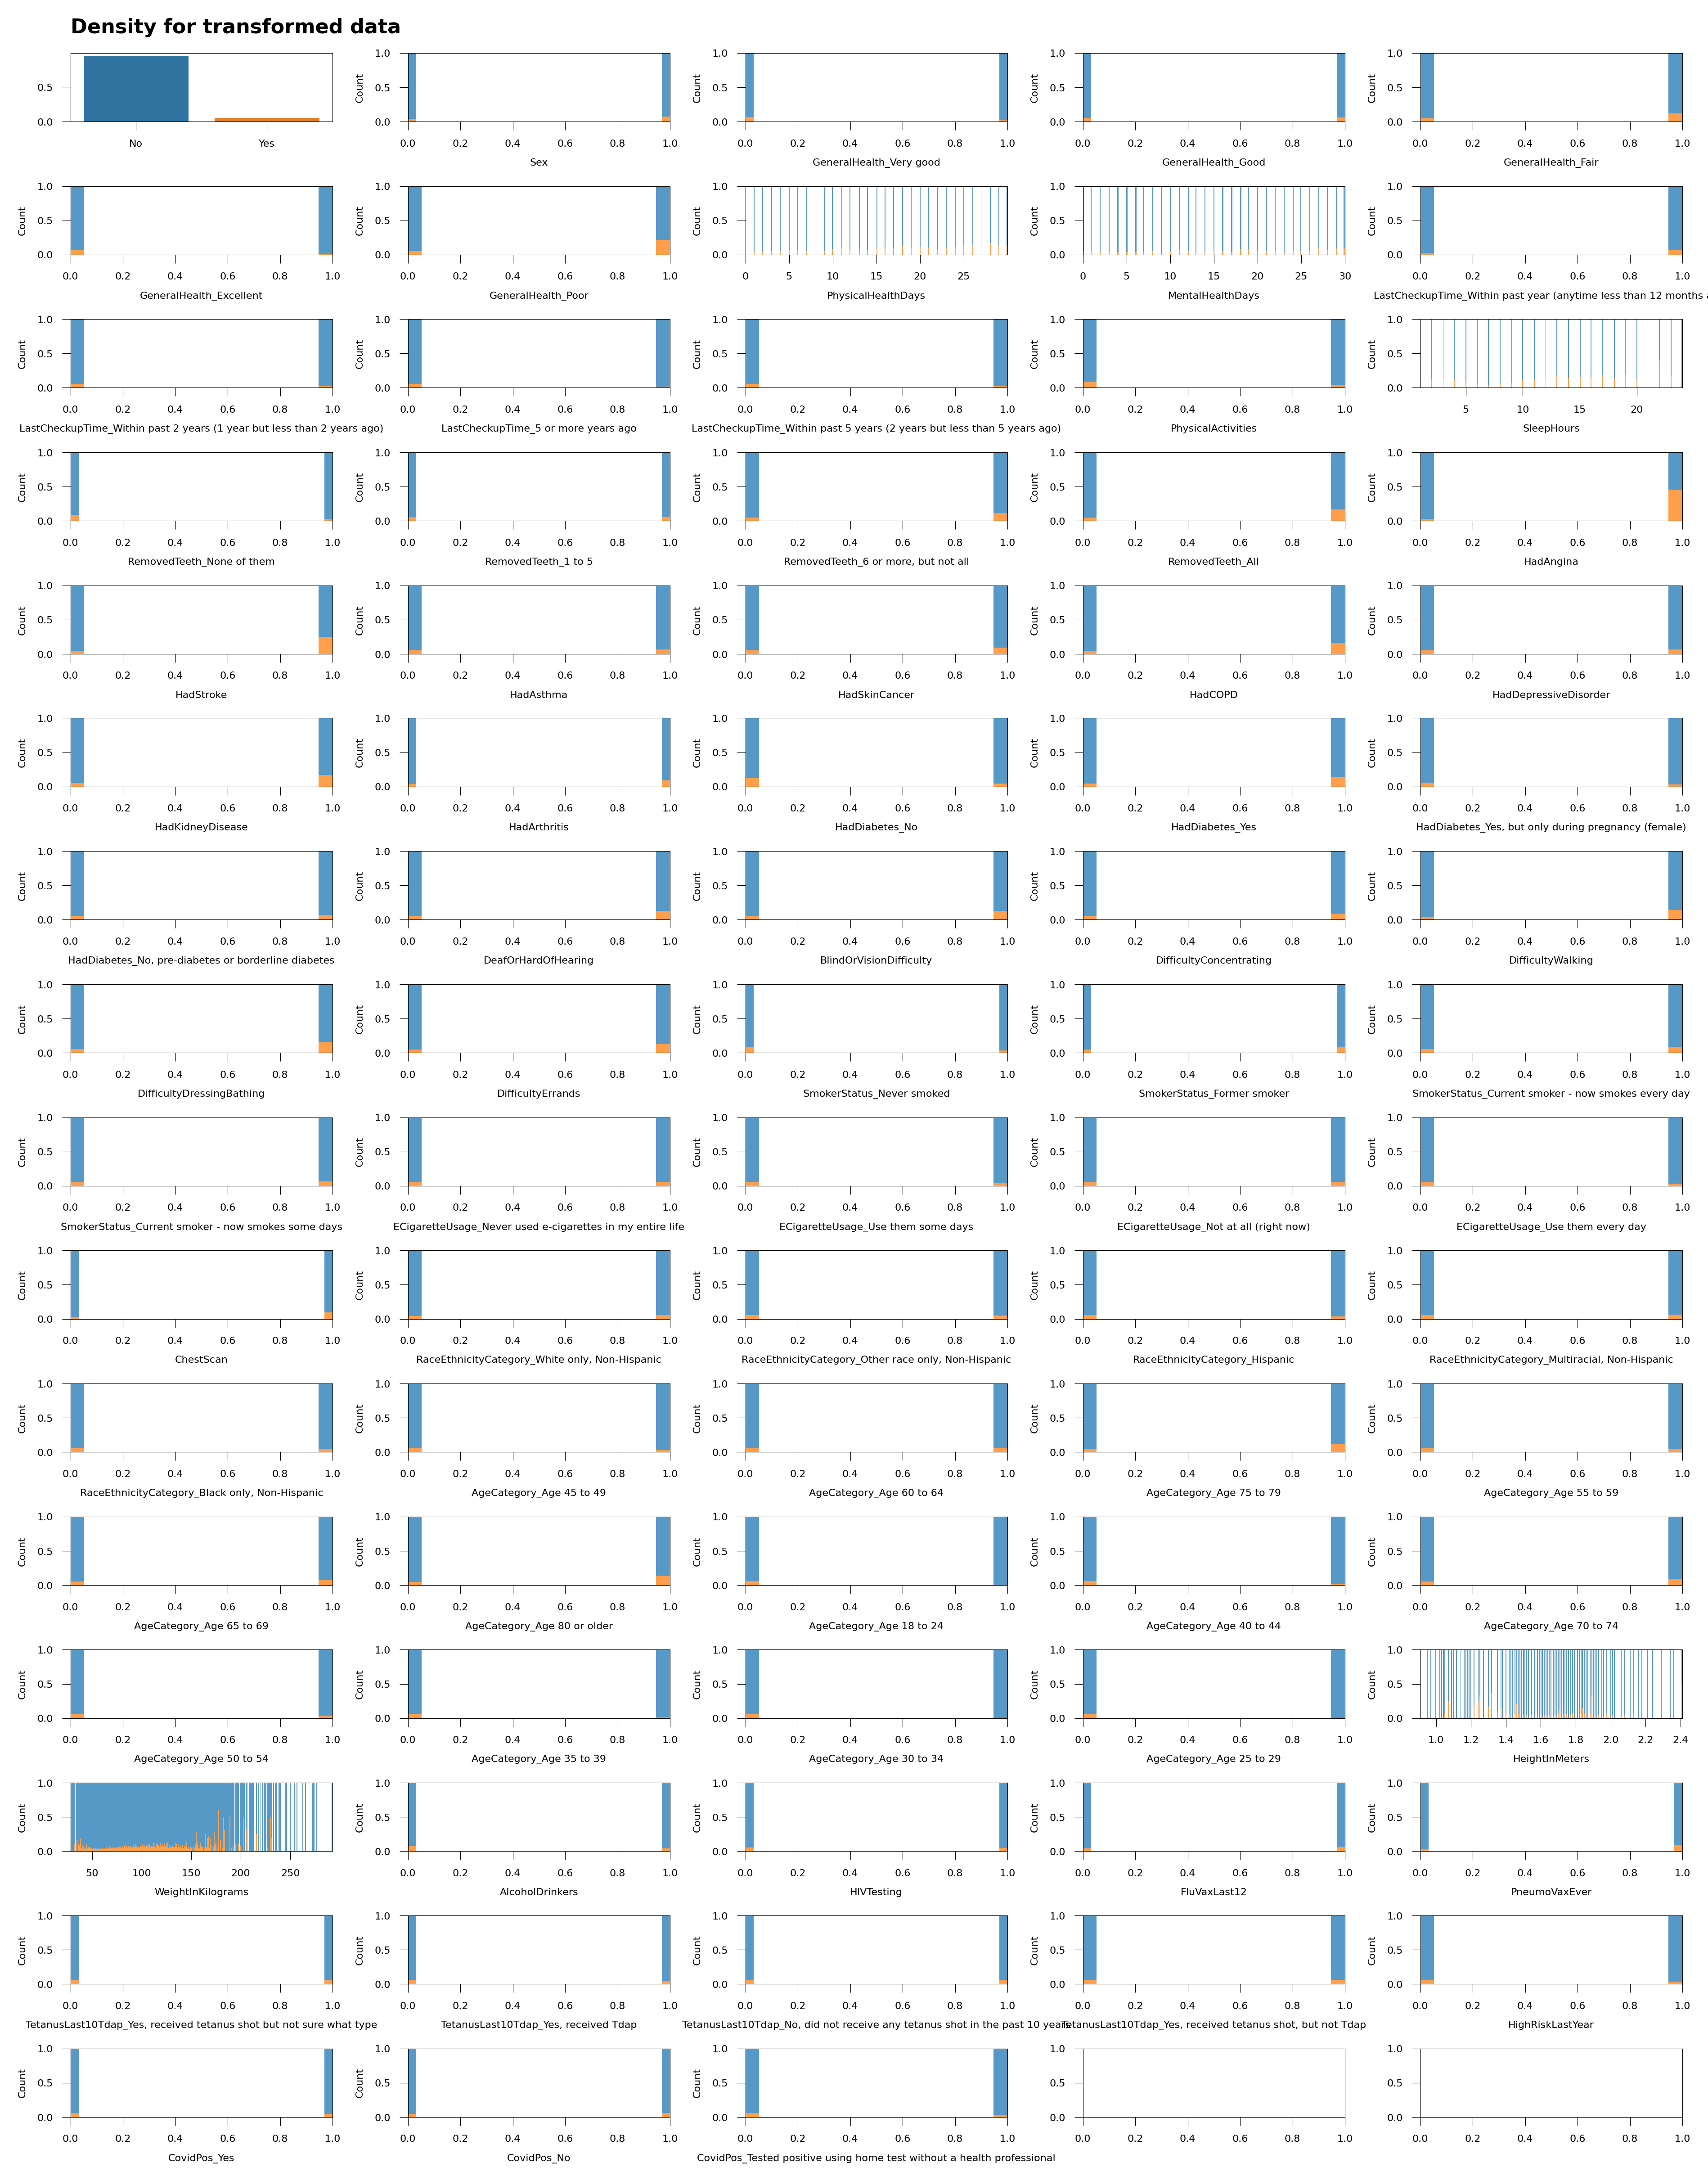

In [27]:
# show the distributions of the data
from math import ceil

# adjustable local plot parameters
TITLE = 'Density for transformed data'
SUBPLOT_SIZE = (750, 300)

# setting local plot parameters
plots_per_col = 5
shape = (plots_per_col, ceil(exp.dataset_transformed.shape[1] / plots_per_col))
figsize = tuple(pxs[0] * pxs[1] / DPI for pxs in zip(SUBPLOT_SIZE, shape))
title_params['label'] = TITLE

# plot grid
axs = plt.subplots(
  nrows=shape[1],
  ncols=shape[0],
  layout='constrained',
  figsize=figsize,
)[1].flat

# plot target distribution
target_dist_data = exp.y.value_counts(normalize=True)
ax = sns.barplot(
  x=target_dist_data.index,
  y=target_dist_data.values,
  ax=axs[0],
  palette=COLORMAP,
)

# plot data title
axs[0].set_title(**title_params)

# plot features distribution
for x, ax in zip(exp.X_transformed.columns, axs[1:]):
  sns.histplot(
    data=exp.dataset_transformed,
    x=x,
    ax=ax,
    hue=TARGET_NAME,
    legend=False,
    linewidth=0,
    multiple='fill',
    palette=COLORMAP,
  )

# save the plot
plt.savefig(
  fname=f'../images/{TITLE}.png',
  bbox_inches='tight',
)

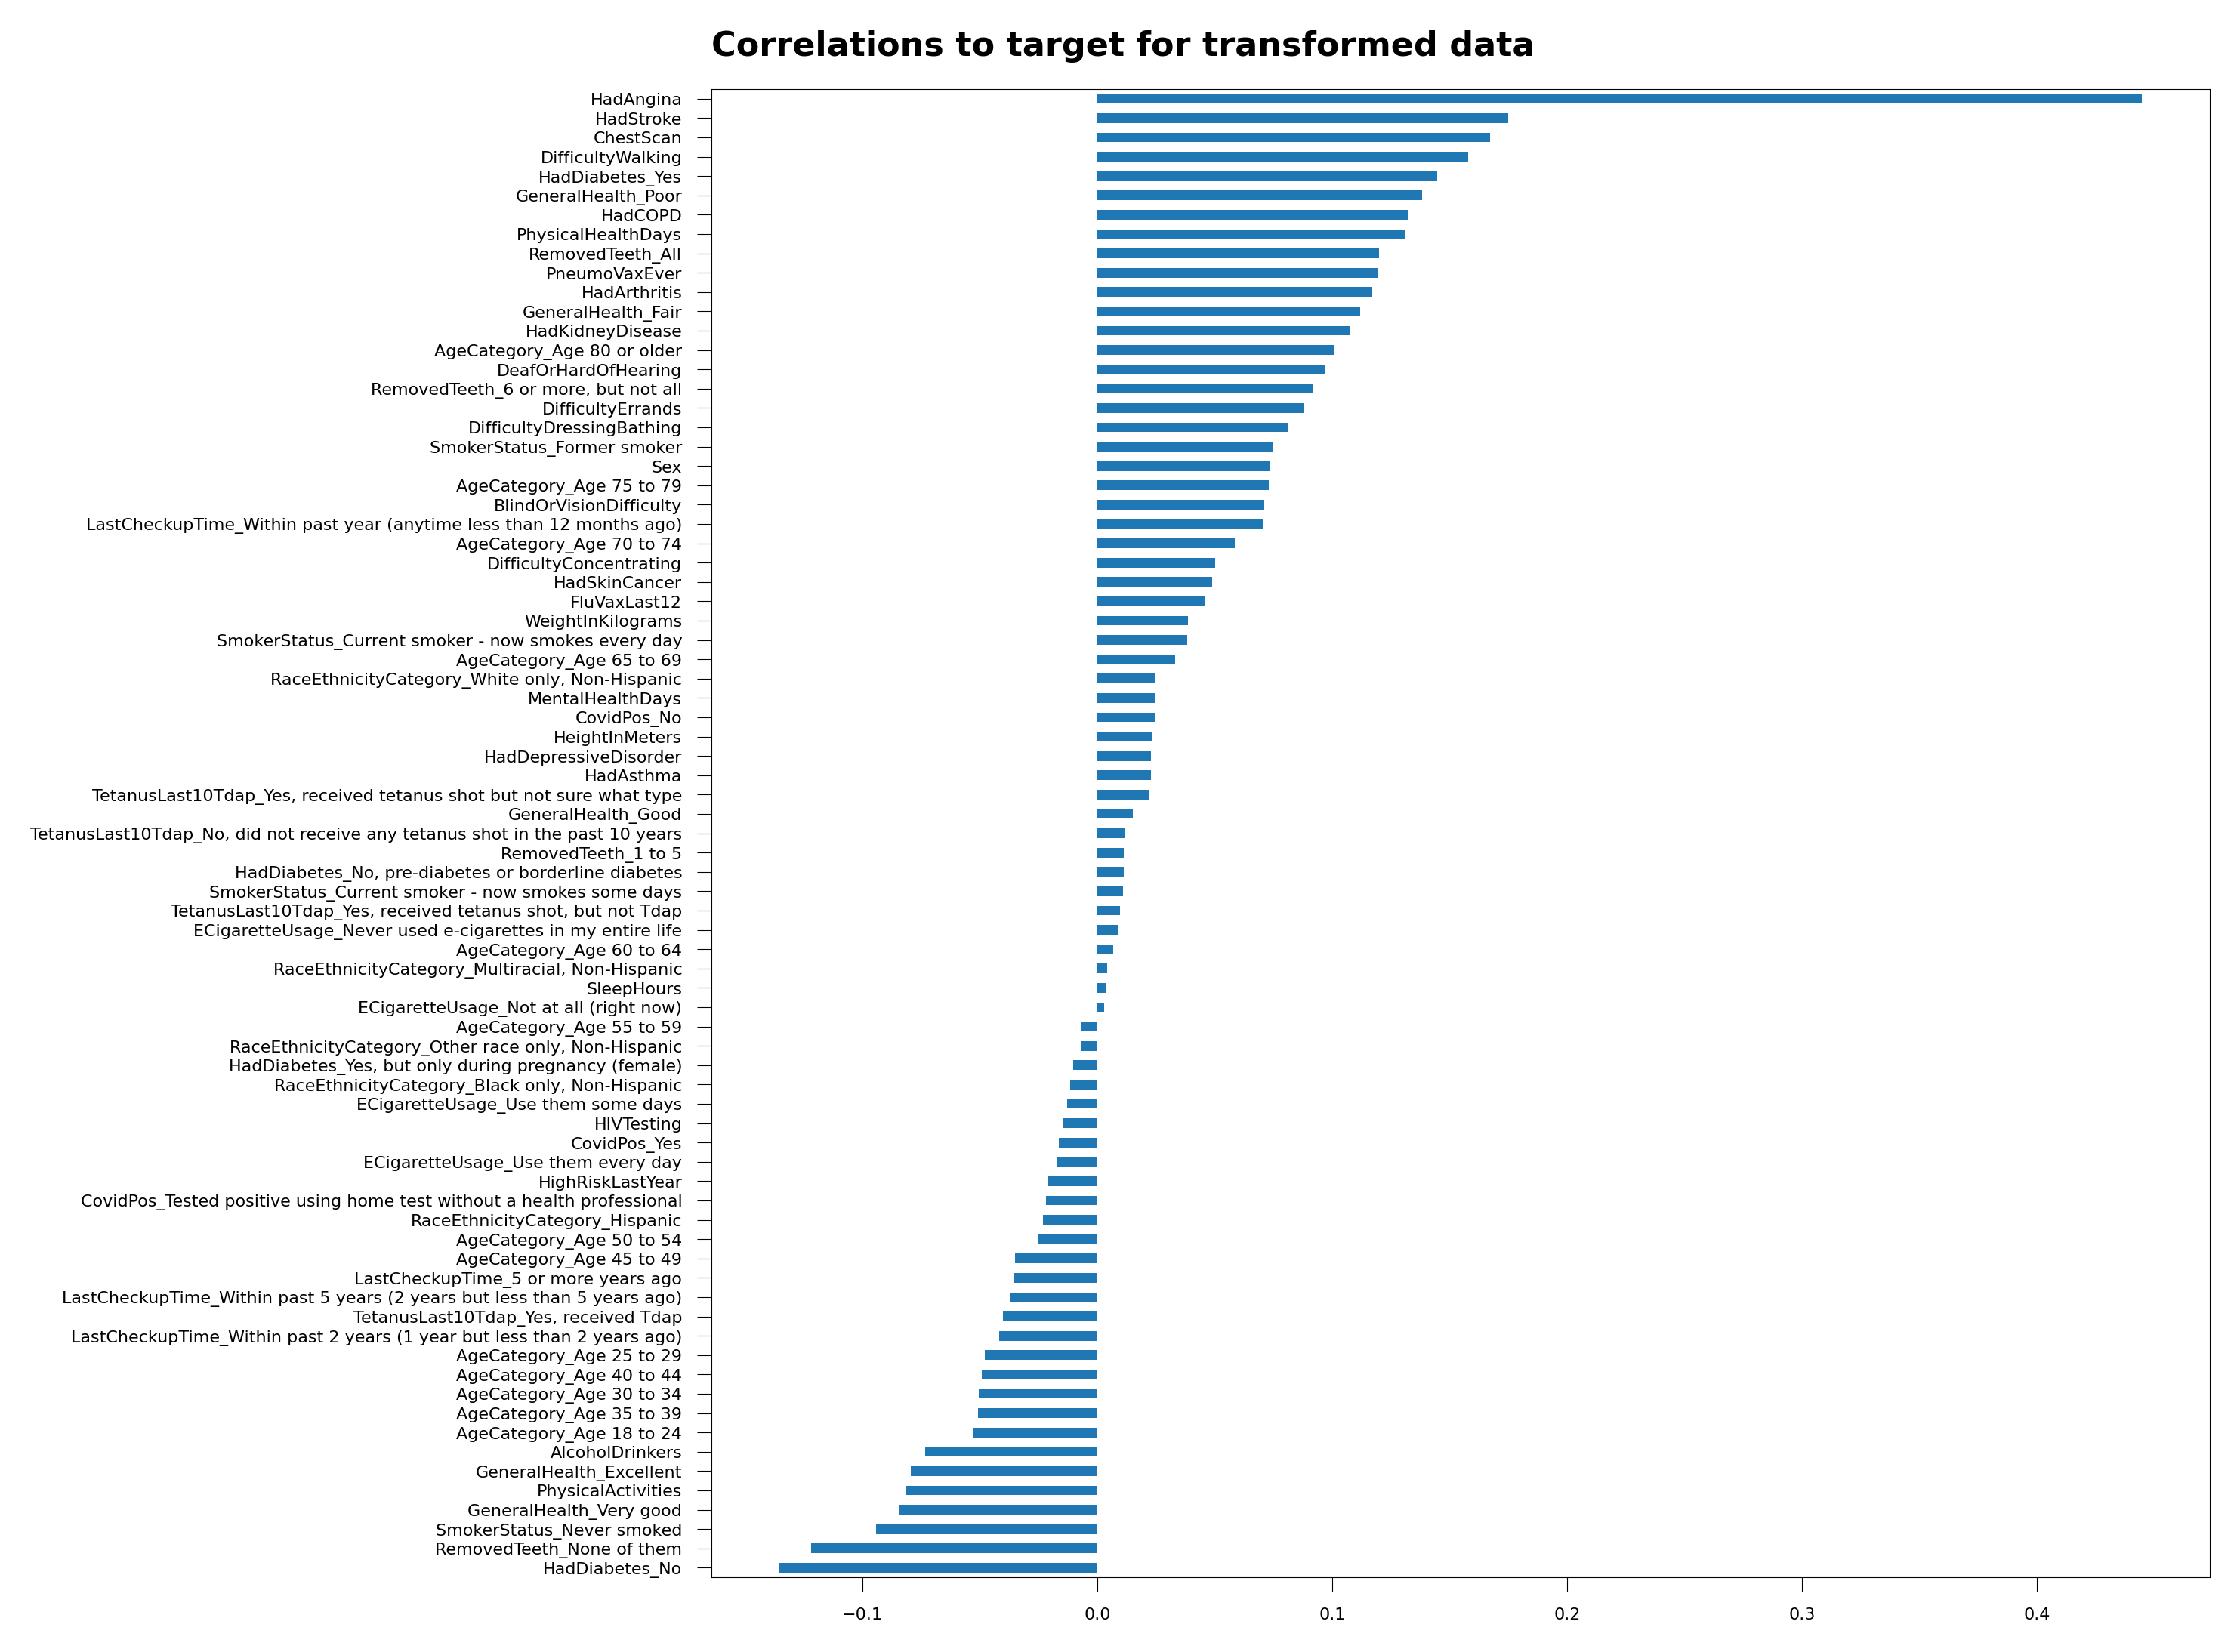

In [28]:
# check correlation between target and features
# adjustable plot parameters
TITLE = 'Correlations to target for transformed data'
PLOT_SIZE = (2560, 2560)

# setting plot parameters
figsize = tuple(px / DPI for px in PLOT_SIZE)
title_params['label'] = TITLE

# plot correlation to target
target_corr_data = (exp.dataset_transformed
  .corr()[TARGET_NAME]
  .drop(TARGET_NAME)
  .sort_values())
ax = target_corr_data.plot.barh(figsize=figsize)
ax.set_title(**title_params)

# save the plot
plt.savefig(
  fname=f'../images/{TITLE}.png',
  bbox_inches='tight',
)

In [29]:
from sklearn.preprocessing import LabelEncoder

data_for_corr2d = exp.dataset.copy(deep=True)
for col in data_for_corr2d.columns:
  dtype = data_for_corr2d[col].dtype
  if dtype == 'object' or dtype == 'category':
    data_for_corr2d[col] = LabelEncoder().fit_transform(data_for_corr2d[col])

corr_data = data_for_corr2d.corr()

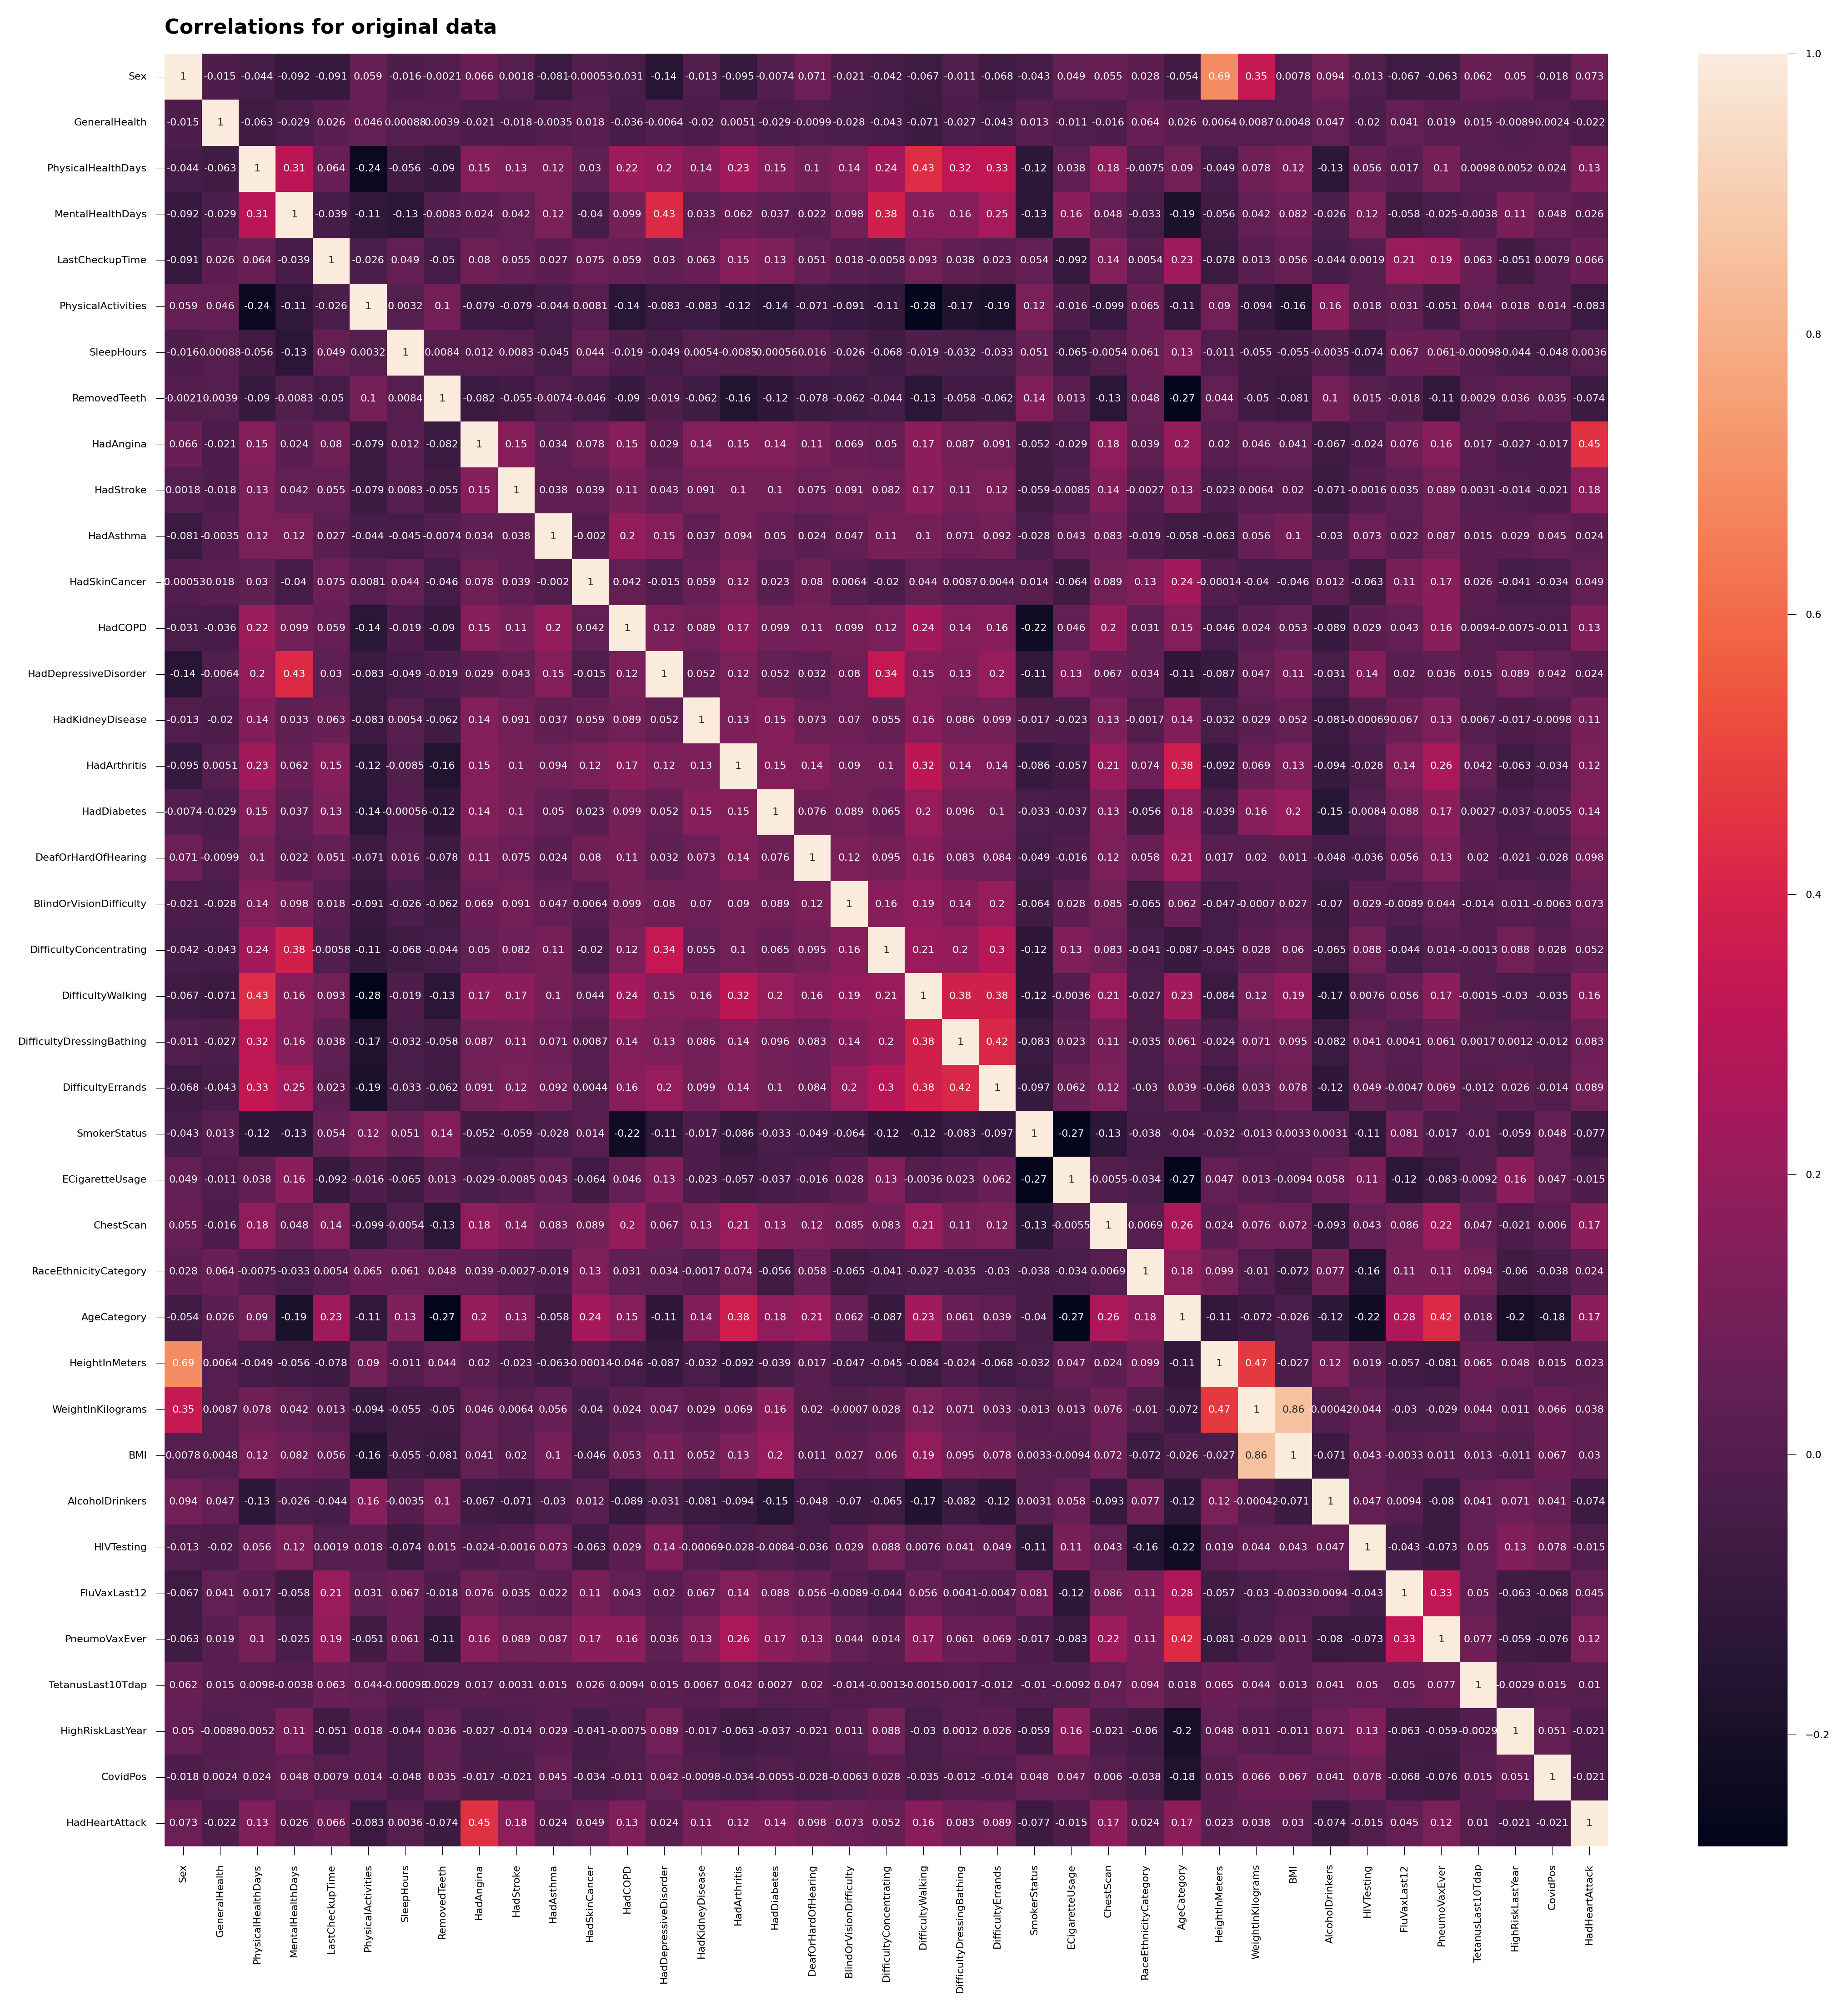

In [30]:
# check correlation between target and features
# adjustable plot parameters
TITLE = 'Correlations for original data'
PLOT_SIZE = (5120, 5120)

# setting plot parameters
figsize = tuple(px / DPI for px in PLOT_SIZE)
title_params['label'] = TITLE

# plot correlation to target
plt.figure(figsize=figsize)
ax = sns.heatmap(
  data=corr_data,
  annot=True,
)
ax.set_title(**title_params)

# save the plot
plt.savefig(
  fname=f'../images/{TITLE}.png',
  bbox_inches='tight',
)

In [31]:
# compare models with AUROC
candicate_model = exp.compare_models(
  exclude=[ # excludes slow and unsuitable models
    'catboost',
    'knn',
    'ridge',
    'svm',
  ],
  sort='Precision',
  cross_validation=False,
)
None

In [32]:
# # if the ranking not shown, uncomment and run this cell
exp.pull()

Model  Accuracy     AUC  Recall   Prec.  \
lda         Linear Discriminant Analysis    0.9396  0.8796  0.9396  0.9430   
nb                           Naive Bayes    0.6027  0.8351  0.6027  0.9403   
ada                 Ada Boost Classifier    0.9465  0.8749  0.9465  0.9358   
lr                   Logistic Regression    0.9477  0.8795  0.9477  0.9357   
gbc         Gradient Boosting Classifier    0.9469  0.8791  0.9469  0.9344   
xgboost        Extreme Gradient Boosting    0.9442  0.8384  0.9442  0.9298   
et                Extra Trees Classifier    0.9460  0.8601  0.9460  0.9271   
rf              Random Forest Classifier    0.9458  0.8660  0.9458  0.9265   
qda      Quadratic Discriminant Analysis    0.5282  0.7100  0.5282  0.9219   
dt              Decision Tree Classifier    0.9129  0.6223  0.9129  0.9201   
dummy                   Dummy Classifier    0.9454  0.5000  0.9454  0.8938   

             F1   Kappa     MCC  TT (Sec)  
lda      0.9412  0.4462  0.4470      1.16  
nb       0.7067  0.1080  0.2134      1.04  
ada      0.9392  0.3447  0.3611      1.53  
lr       0.9386  0.3244  0.3500      2.14  
gbc      0.9375  0.3108  0.3364      2.80  
xgboost  0.9340  0.2698  0.2938      1.19  
et       0.9275  0.1423  0.2044      1.27  
rf       0.9223  0.0552  0.1263      1.21  
qda      0.6454  0.0510  0.1116      1.17  
dt       0.9164  0.2247  0.2257      1.14  
dummy    0.9189  0.0000  0.0000      1.04

In [33]:
# assign the best model id manually

BEST_MODEL_ID = candicate_model

best_model = exp.create_model(
  estimator=BEST_MODEL_ID,
  cross_validation=False,
)
best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

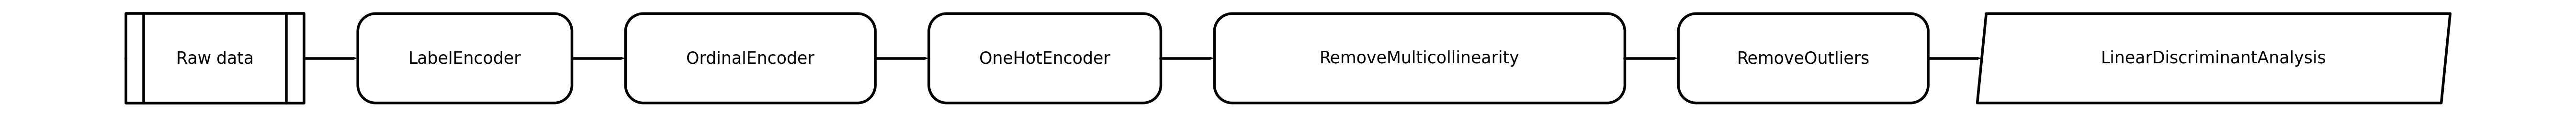

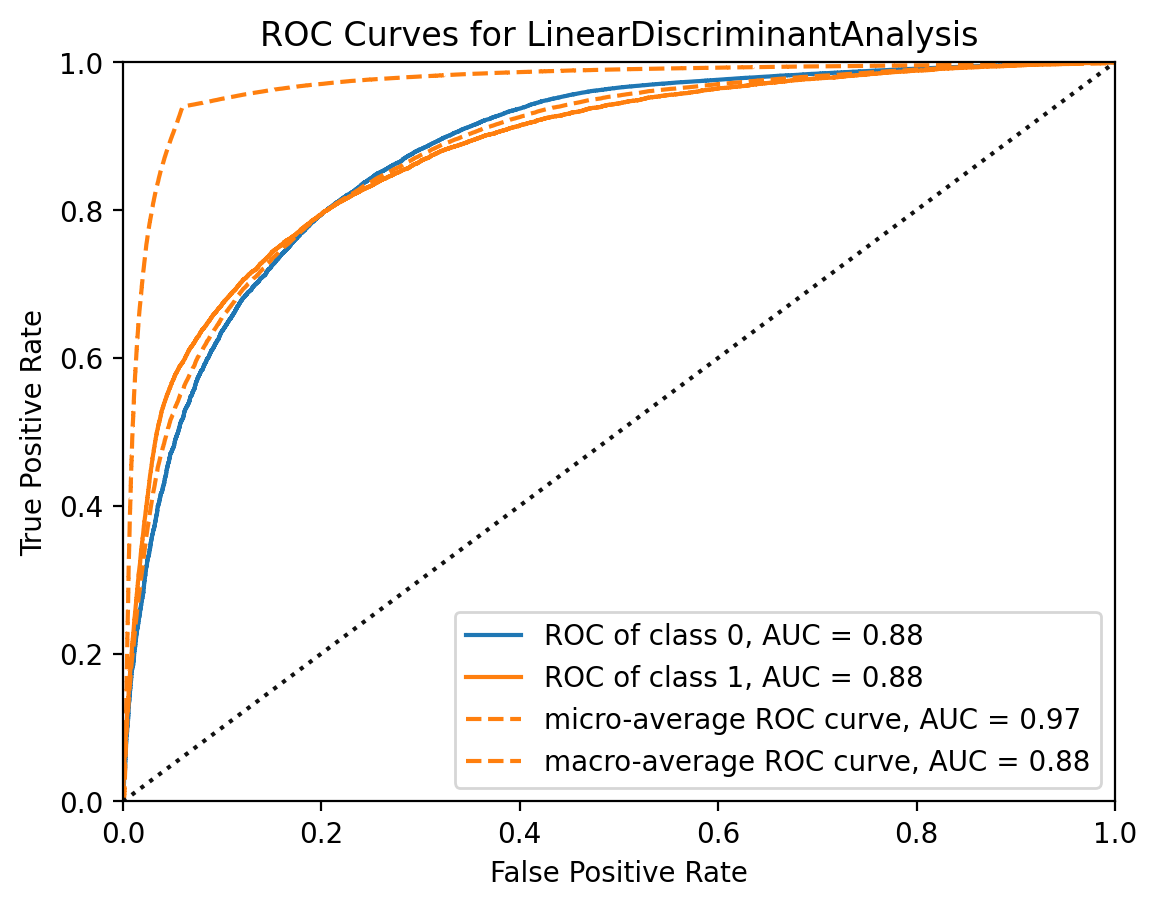

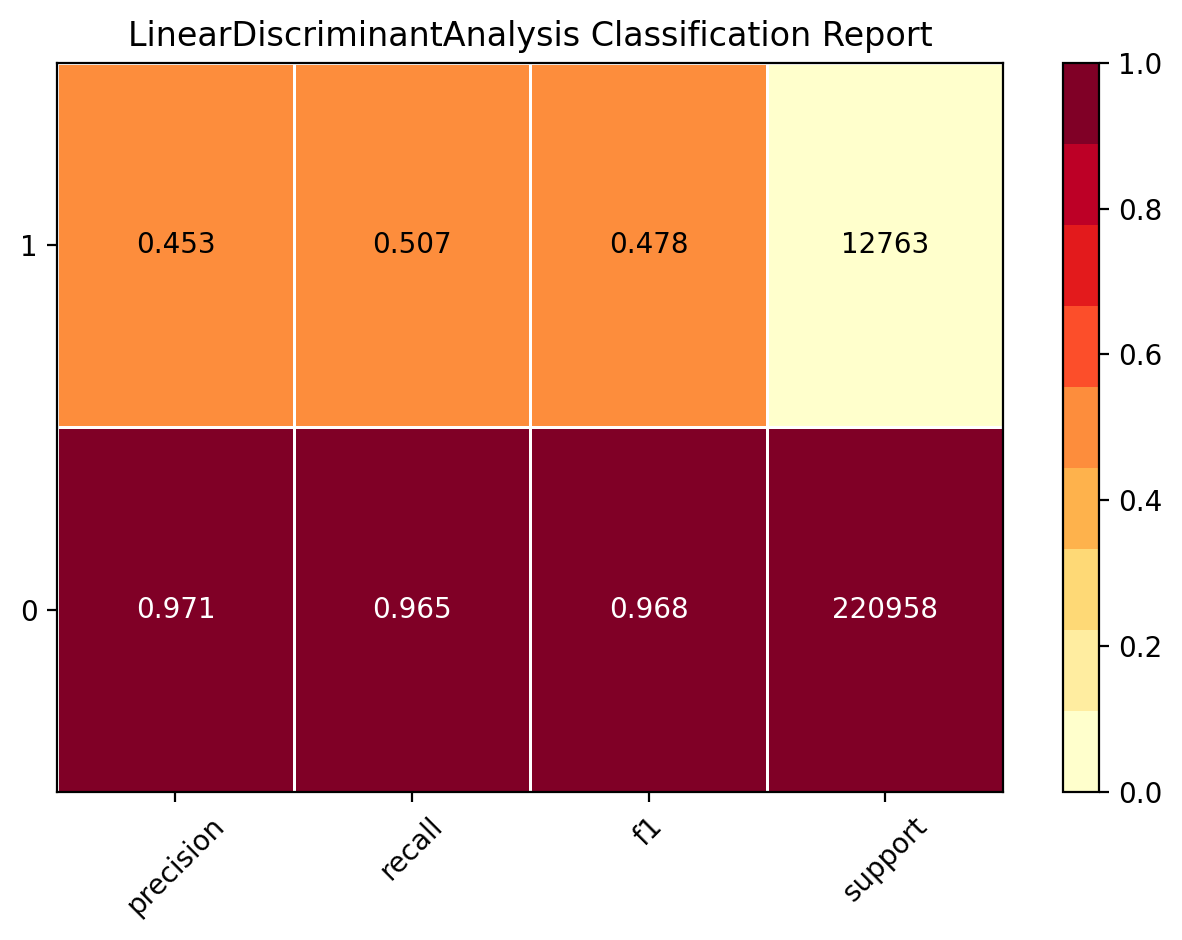

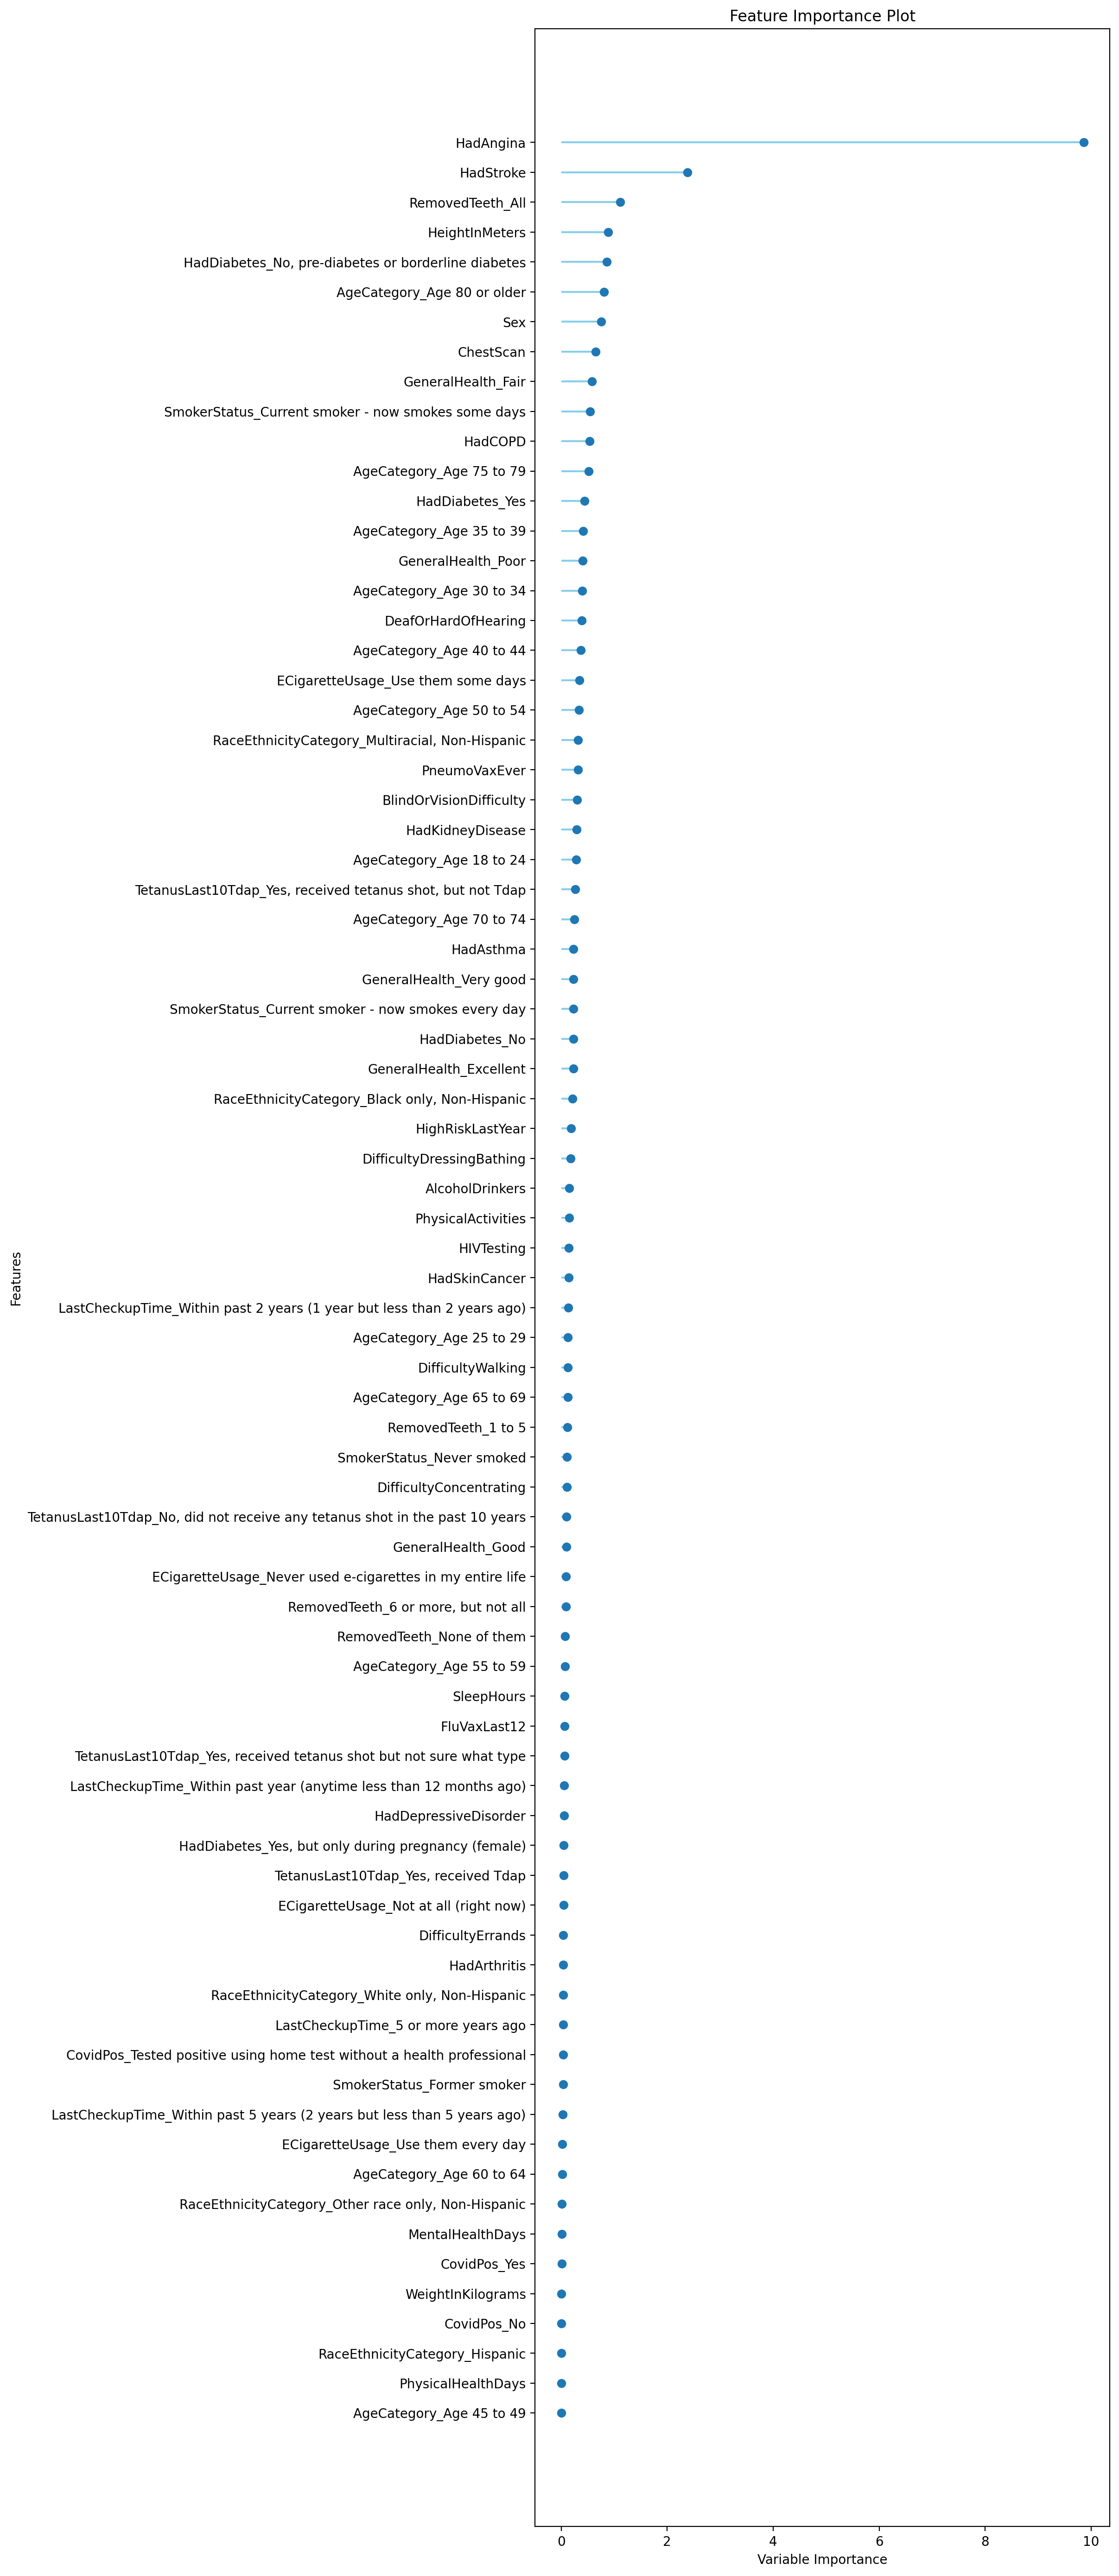

Parameters
covariance_estimator       None
n_components               None
priors                     None
shrinkage                  None
solver                      svd
store_covariance          False
tol                      0.0001

In [34]:
# profile the best model
# reset old global plot parameters
plt.rcdefaults()

plot_types = [
  'pipeline',
  'auc',
  'class_report',
  'feature_all',
  'parameter',
]
for plot_type in plot_types:
  exp.plot_model(
    estimator=best_model,
    plot=plot_type,
    plot_kwargs={
      'block': False,
    },
    scale=2,
  )

In [35]:
# tune the best model

tuned_best_model = exp.tune_model(
  estimator=best_model,
  optimize='auc',
  n_iter=5,
  search_library='optuna',
  search_algorithm='tpe',
)
exp.plot_model(
  estimator=tuned_best_model,
  plot='parameter',
  plot_kwargs={
    'block': False,
  },
  scale=2,
)

[I 2023-12-20 11:08:03,918] Searching the best hyperparameters using 12301 samples...
[I 2023-12-20 11:08:39,712] Finished hyperparameter search!


Parameters
covariance_estimator                  None
n_components                          None
priors                                None
shrinkage             0.009358515562280545
solver                                lsqr
store_covariance                     False
tol                                 0.0001

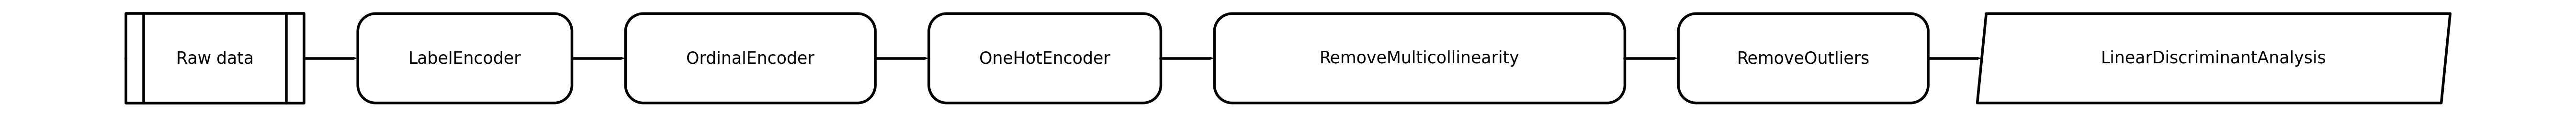

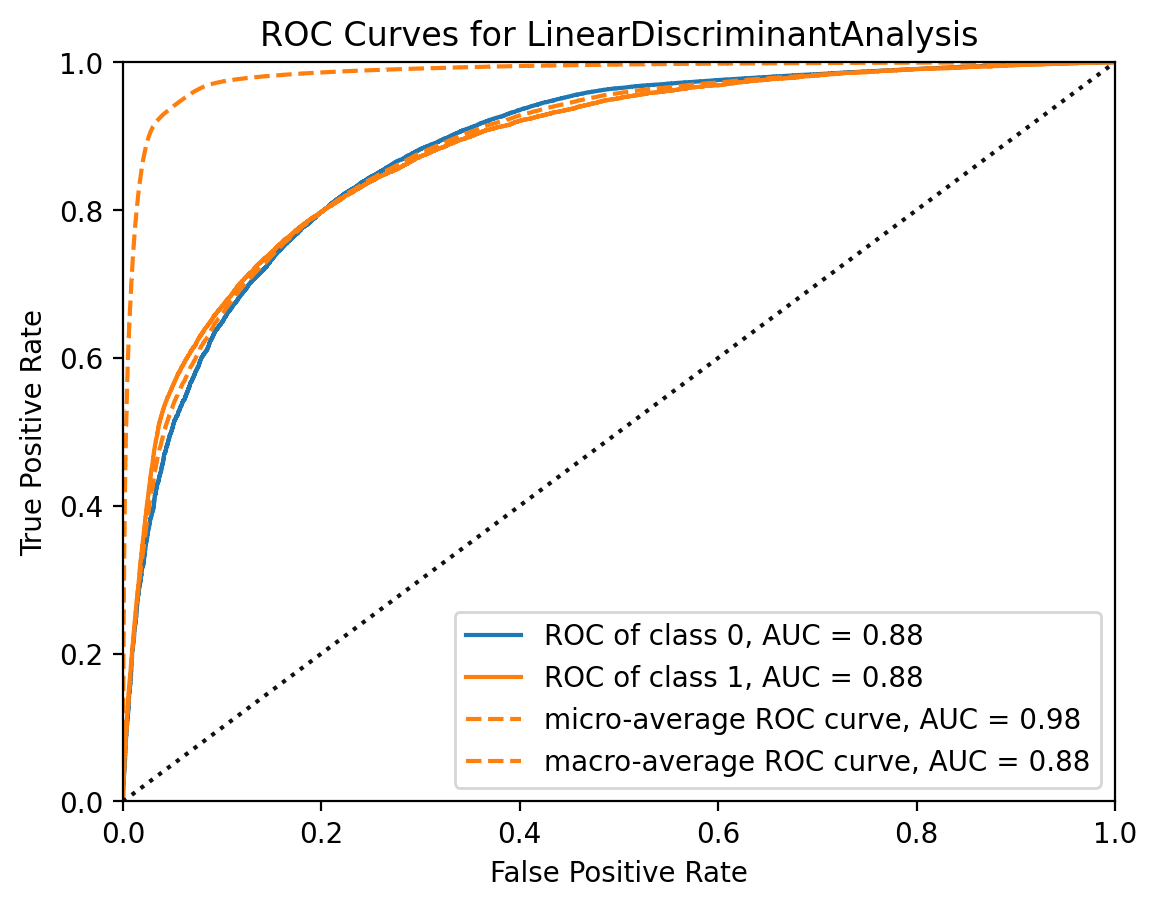

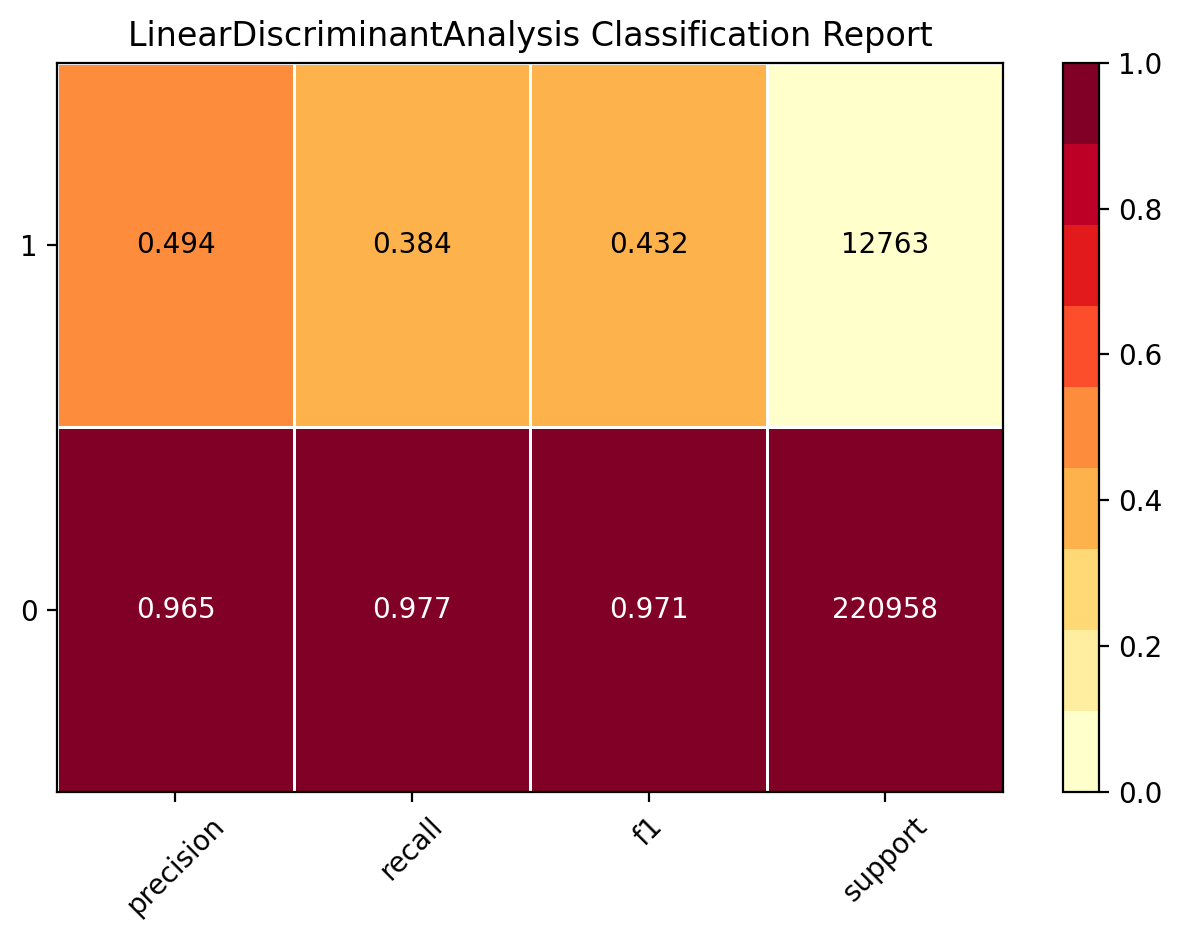

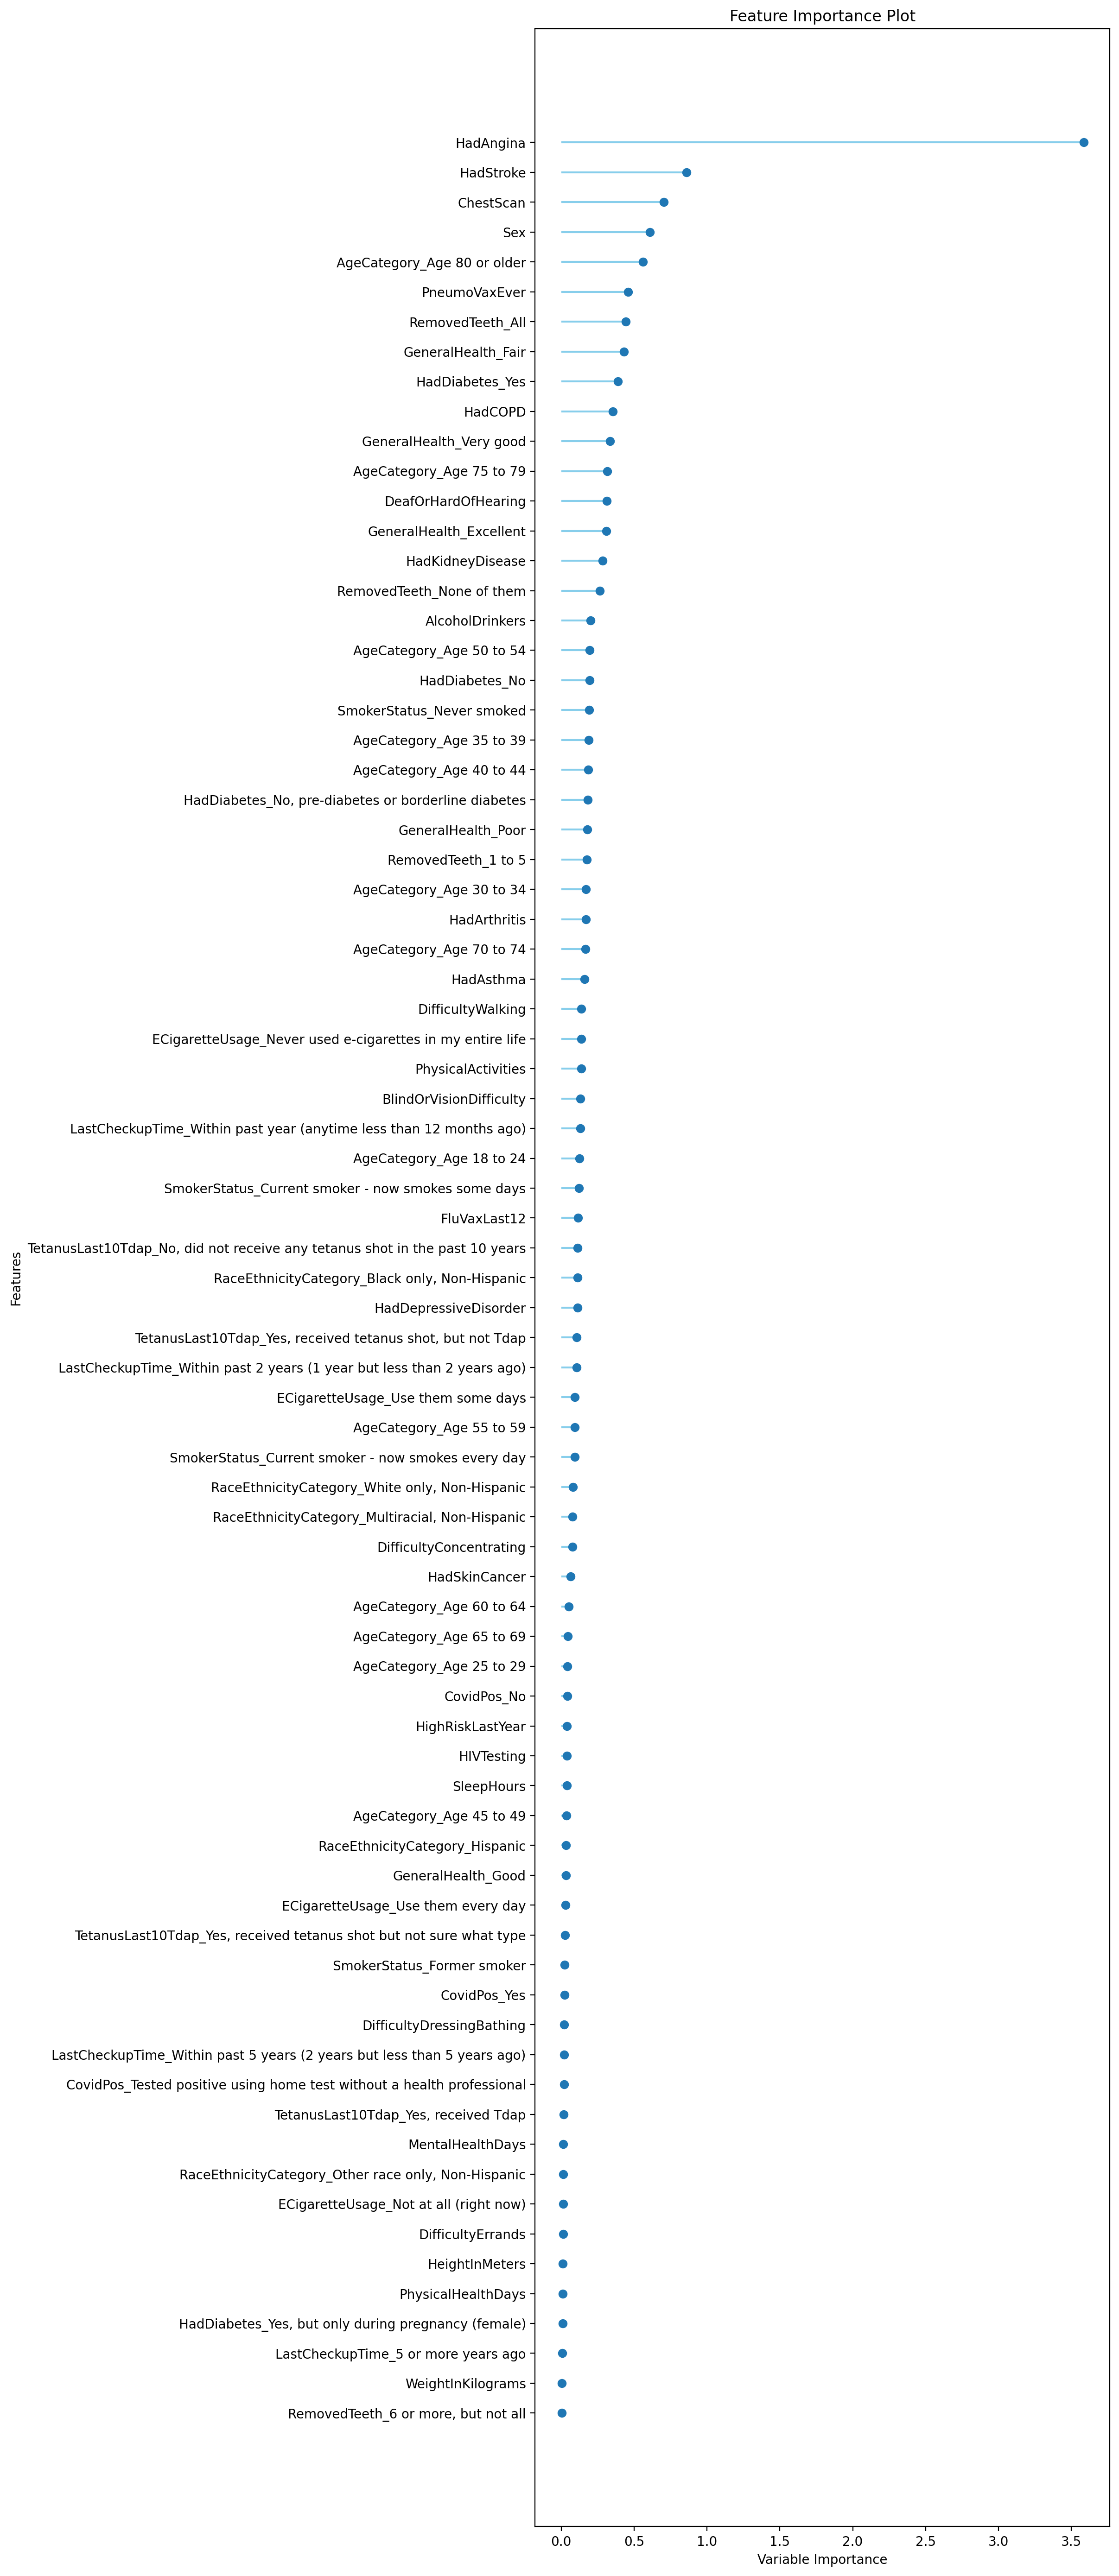

Parameters
covariance_estimator                  None
n_components                          None
priors                                None
shrinkage             0.009358515562280545
solver                                lsqr
store_covariance                     False
tol                                 0.0001

In [36]:
plot_types = [
  'pipeline',
  'auc',
  'class_report',
  'feature_all',
  'parameter',
]
for plot_type in plot_types:
  exp.plot_model(
    estimator=tuned_best_model,
    plot=plot_type,
    plot_kwargs={
      'block': False,
    },
    scale=2,
  )

In [37]:
# show hold-out predictions
predictions = exp.predict_model(
  estimator=best_model,
  raw_score=True,
)
predictions[filter(
  lambda name: name.startswith('prediction_'),
  predictions.columns,
)]

prediction_label  prediction_score_No  prediction_score_Yes
218220               No               0.9986                0.0014
67828                No               0.9993                0.0007
203453               No               0.9976                0.0024
225518               No               0.9992                0.0008
36816                No               0.9996                0.0004
...                 ...                  ...                   ...
9202                 No               0.9964                0.0036
229824               No               0.9990                0.0010
32801                No               0.9991                0.0009
102154               No               0.9978                0.0022
3610                 No               0.9992                0.0008

[233721 rows x 3 columns]

In [38]:
# save the experiment and model
from pathlib import Path

Path('../models/heart-best').mkdir(
  parents=True,
  exist_ok=True,
)

exp.save_experiment(
  path_or_file='../models/heart-best/experiment.pkl',
)
exp.save_model(
  model=best_model,
  model_name='../models/heart-best/model',
  model_only=False,
)
None

Transformation Pipeline and Model Successfully Saved
